In [53]:
# packages 

import math
import random
from operator import itemgetter
from sklearn import datasets
import numpy as np

In [54]:
def handleDataset(dataset, split, trainingSet=[], testSet=[]):
    for x in range(len(dataset)-1):
        for y in range(4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In [55]:
iris = datasets.load_iris()
trainingSet = []
testSet = []
X = iris.data
y = iris.target

dataSet = []
for i in range(len(X)):
    dataSet.append(np.append(X[i],float(y[i])))
    

dataSet = np.asarray(dataSet)

handleDataset(dataSet, 0.66, trainingSet, testSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))

Train: 79
Test: 70


In [56]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += (instance1[x] ** 2) + (instance2[x] ** 2)
    return math.sqrt(distance)

In [78]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [58]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [59]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [60]:

#K = 25 NP = 23
testInstance = dataSet[len(dataSet)-1]
for x in range(4):
    testInstance[x] = float(testInstance[x])
neighbors = getKNeighbors(trainingSet, testInstance, 48)
response = getResponse(neighbors)

print(response)

0.0


In [79]:
def main(k): 
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    handleDataset(dataSet, split, trainingSet, testSet)
    
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    
    # generate predictions
    
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getKNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        
     
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    

In [80]:
main(3)

Train set: 100
Test set: 49
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=2.0
> predicted=0.0, actual=2.0
> predicted=0.0, actual=2.0
> predicted=0.0, act

In [73]:
main(5)

Train set: 94
Test set: 55
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actu

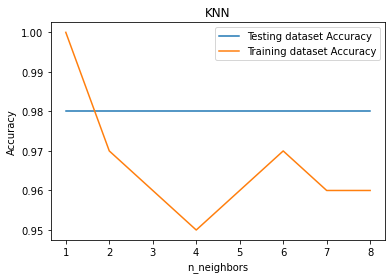

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
 
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.33, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.title('KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

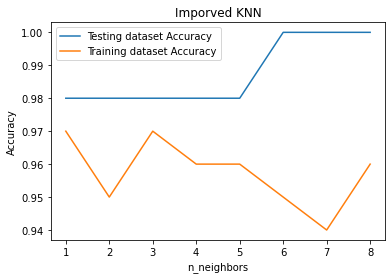

In [2]:
from math import factorial

def is_prime(x):
    return factorial(x - 1)  % x == x - 1 
    

def get_NP(x):
    for i in range(x,0,-1):
        if is_prime(i):
            return i
    
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.33, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K+NP values
for i, k in enumerate(neighbors):
    new_k = k + get_NP(k)
    knn = KNeighborsClassifier(n_neighbors=new_k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.title('Imporved KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()